**Spam Message Detection**

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('spam.csv')

In [ ]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.columns

Index(['sms', 'label'], dtype='object')

In [ ]:
#Number of messages
len(df)

5574

In [ ]:

spam_ham = df['label'].value_counts()

In [ ]:
spam = spam_ham[0]
ham = spam_ham[1]
print(f'Number of Spam messages: {spam}')
print(f'Number of Ham messages: {ham}')

Number of Spam messages: 4827
Number of Ham messages: 747


<Axes: xlabel='label'>

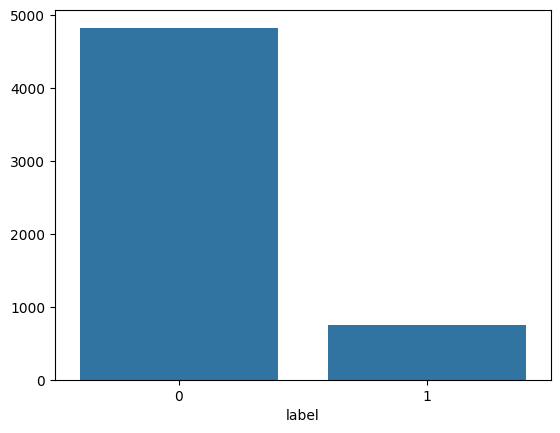

In [ ]:
sns.barplot(x = spam_ham.index, y = spam_ham.values)

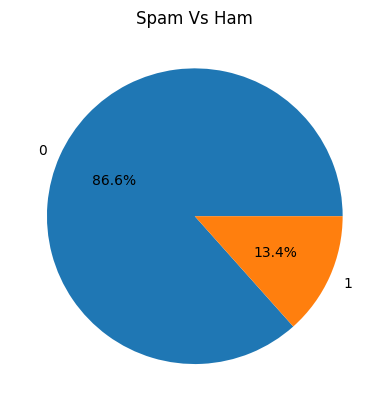

In [ ]:
plt.pie(spam_ham.values, labels = spam_ham.index, autopct = '%1.1f%%')
plt.title('Spam Vs Ham')
plt.show()

In [ ]:
def lemmatization(message):
    sent = nltk.sent_tokenize(message)
    lemmatized_sentences = []
    for s in sent:
        words = nltk.word_tokenize(s)
        words = [WordNetLemmatizer().lemmatize(word.lower(), pos='v') for word in words if word.lower() not in set(stopwords.words('english'))]
        lemmatized_sentences.append(' '.join(words))
    return ' '.join(lemmatized_sentences)

In [ ]:

df['new_sms'] = df['sms'].apply(lemmatization)

In [ ]:
df

,sms,label,new_sms
0,"Go until jurong point, crazy.. Available only ...",0,"go jurong point , crazy .. available bugis n g..."
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor ... u c already say ...
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah n't think go usf , live around though"
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,2nd time try 2 contact u. u £750 pound prize ....
5570,Will ü b going to esplanade fr home?\n,0,ü b go esplanade fr home ?
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * mood . ... suggestions ?"
5572,The guy did some bitching but I acted like i'd...,0,guy bitch act like 'd interest buy something e...


In [ ]:
#dropping old columns
df.drop(['sms'],axis=1,inplace=True)

In [ ]:
df

,label,new_sms
0,0,"go jurong point , crazy .. available bugis n g..."
1,0,ok lar ... joke wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,"nah n't think go usf , live around though"
...,...,...
5569,1,2nd time try 2 contact u. u £750 pound prize ....
5570,0,ü b go esplanade fr home ?
5571,0,"pity , * mood . ... suggestions ?"
5572,0,guy bitch act like 'd interest buy something e...


In [ ]:
#Splitting Data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['new_sms'], df['label'], test_size = 0.20, random_state = 42, stratify= df['label'])
'''random_state ensures your data is split in the exact same random way every time you run the code, making your results reproducible.

stratify ensures the training and testing sets have the same proportion of Spam and Ham messages as the original dataset, which is crucial for imbalanced data.'''

'random_state ensures your data is split in the exact same random way every time you run the code, making your results reproducible.\n\nstratify ensures the training and testing sets have the same proportion of Spam and Ham messages as the original dataset, which is crucial for imbalanced data.'

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4459,)
(1115,)


In [ ]:
# Using TF-IDF Technique on split data to convert text -> Vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train) # Learn and apply
X_test_tfidf = tfidf.transform(X_test) # Only Apply

print('TF-IDF Vectorization Successful')

TF-IDF Vectorization Successful


In [ ]:
# Using Logistic Regression to classify the data
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = 'balanced', random_state = 42) # class_weight = balanced => will help in automatically handling imbalance data by weighting miniority class higher.
lr_model.fit(X_train_tfidf,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Prediction of Test Set
y_pred = lr_model.predict(X_test_tfidf)

In [ ]:
#Evaluating Performance
from sklearn.metrics import confusion_matrix, precision_score, classification_report

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Confusion Matrix:
 [[959   7]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.95      0.94      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



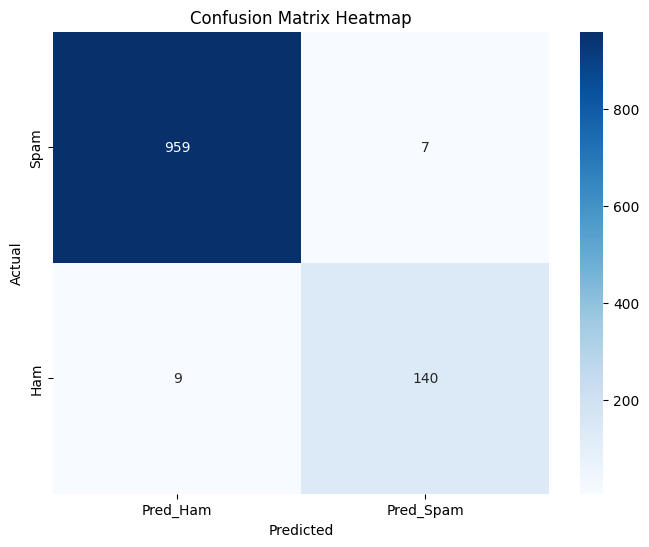

The heatmap clearly confirms our system's success.
It shows we've built a filter that's exceptionally good at catching the junk mail while, most importantly, being highly reliable 
So it doesn't accidentally block those crucial real messages.


In [ ]:
#Making Heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred_Ham', 'Pred_Spam'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
print("The heatmap clearly confirms our system's success.\nIt shows we've built a filter that's exceptionally good at catching the junk mail while, most importantly, being highly reliable \nSo it doesn't accidentally block those crucial real messages.")

**THANK YOU!**